In [2]:
from neuralprophet import NeuralProphet

In [13]:
# Input Data

import pandas as pd
df = pd.read_csv(
    'C:/Users/DataKnow/Documents/neural_prophet/example_data/wp_log_peyton_manning.csv'
    )
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [24]:
# Simple Model
m = NeuralProphet(weekly_seasonality=True)
metrics = m.fit(df, freq="W")

INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 32
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 22


INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 4.33E-01
Epoch[22/22]: 100%|████████████████████████| 22/22 [00:03<00:00,  5.59it/s, SmoothL1Loss=0.00535, MAE=0.355, RegLoss=0]


In [1]:
# Future
future = m.make_future_dataframe(df, periods=365)
forecast = m.predict(future)

NameError: name 'm' is not defined

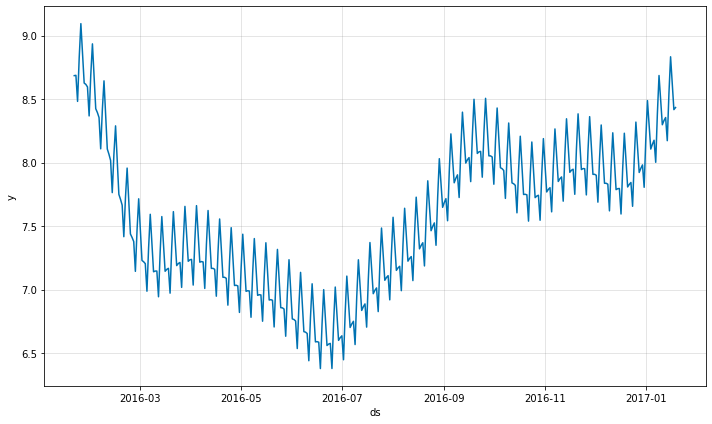

In [26]:
forecasts_plot = m.plot(forecast)

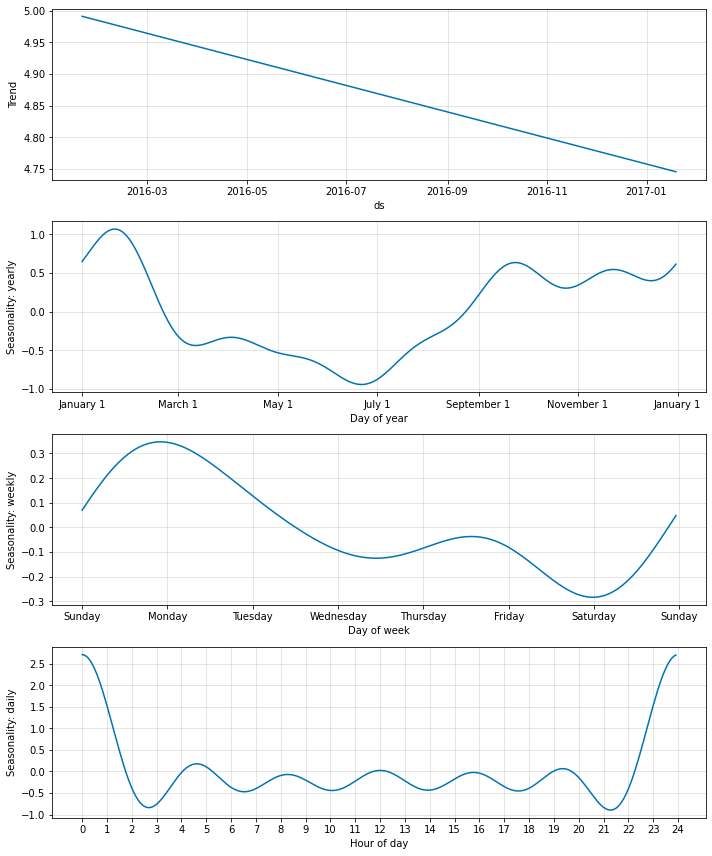

In [27]:
# Por componentes
fig_comp = m.plot_components(forecast)

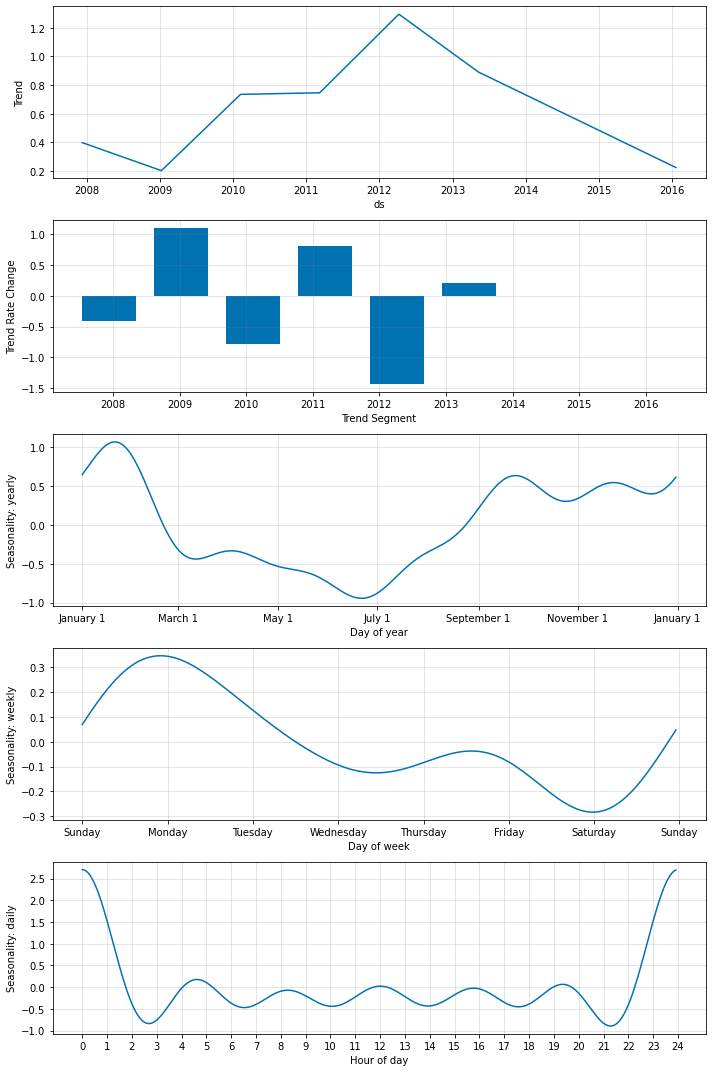

In [28]:
# Coeficientes individuales
fig_param = m.plot_parameters()

In [38]:
# Validacion del modelo
# Se puede hacer por dos frentes: Split de datos, por cada eproch
m = NeuralProphet(daily_seasonality=True)
# Frente 1
df_train, df_val = m.split_df(df, valid_p=0.2)
train_metrics = m.fit(df_train, freq="D")
val_metrics = m.test(df_val)

INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 32
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 27


INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 6.58E-01
Epoch[27/27]: 100%|████████████████████████| 27/27 [00:03<00:00,  6.80it/s, SmoothL1Loss=0.00542, MAE=0.363, RegLoss=0]
INFO: nprophet - _evaluate: Validation metrics:    SmoothL1Loss    MAE
1         0.004  0.334


In [44]:
# Frente 2
m = NeuralProphet(daily_seasonality=True)
metrics = m.fit(df, freq="D", validate_each_epoch=True, valid_p=0.2)

INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 32
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 27


INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 2.85E-01
Epoch[27/27]: 100%|█| 27/27 [00:04<00:00,  6.28it/s, SmoothL1Loss=0.00536, MAE=0.365, RegLoss=0, MAE_val=0.325, SmoothL


In [ ]:
# Reproducibilidad
# Esta semilla ayuda a mantener los resultado para los modelos creados
from neuralprophet import set_random_seed 
set_random_seed(42)

## Tendencia del modelo

In [48]:
m = NeuralProphet(
    n_changepoints=100,
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
)
metrics = m.fit(df, freq="D")

INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 32
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 22


INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 2.85E+00
Epoch[22/22]: 100%|█████████████████████████| 22/22 [00:02<00:00,  8.33it/s, SmoothL1Loss=0.0105, MAE=0.535, RegLoss=0]
